###  In this project, we will be conducting EDA on a Google Merchandise Store dataset to gain a better understanding of the traffic to the website. The dataset used here was originally intended to forecast customer revenue in a Kaggle competition. Notably, some of the dataset's columns were formatted in JSON and will need to be converted into conventional columns to satisfy our particular use case.
#### Link to dataset: https://www.kaggle.com/competitions/ga-customer-revenue-prediction/data

In [1]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import json
from pandas.io.json import json_normalize
import os
import datetime
import squarify
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Function to convert json columns type to normal columns
def load_df(csv_path='/Users/gokul/DS/Projects/Google_Analytics/train.csv', nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows)
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df

In [3]:
# Reading in the files and converting json columns
training_df = load_df()
testing_df = load_df("/Users/gokul/DS/Projects/Google_Analytics/test.csv")

/var/folders/pf/h7r0xfy90zj7hymt1khj60600000gn/T/ipykernel_85825/3869845954.py:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  column_as_df = json_normalize(df[column])
/var/folders/pf/h7r0xfy90zj7hymt1khj60600000gn/T/ipykernel_85825/3869845954.py:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  column_as_df = json_normalize(df[column])
/var/folders/pf/h7r0xfy90zj7hymt1khj60600000gn/T/ipykernel_85825/3869845954.py:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  column_as_df = json_normalize(df[column])
/var/folders/pf/h7r0xfy90zj7hymt1khj60600000gn/T/ipykernel_85825/3869845954.py:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  column_as_df = json_normalize(df[column])


Loaded train.csv. Shape: (903653, 55)


/var/folders/pf/h7r0xfy90zj7hymt1khj60600000gn/T/ipykernel_85825/3869845954.py:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  column_as_df = json_normalize(df[column])
/var/folders/pf/h7r0xfy90zj7hymt1khj60600000gn/T/ipykernel_85825/3869845954.py:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  column_as_df = json_normalize(df[column])
/var/folders/pf/h7r0xfy90zj7hymt1khj60600000gn/T/ipykernel_85825/3869845954.py:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  column_as_df = json_normalize(df[column])
/var/folders/pf/h7r0xfy90zj7hymt1khj60600000gn/T/ipykernel_85825/3869845954.py:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  column_as_df = json_normalize(df[column])


Loaded test.csv. Shape: (804684, 53)


In [4]:
training_df


,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,...,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.isTrueDirect,trafficSource.referralPath,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent,trafficSource.campaignCode
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,not available in demo dataset,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903648,Social,20170104,5123779100307500332,5123779100307500332_1483554750,Not Socially Engaged,1483554750,1,1483554750,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,/yt/about/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
903649,Social,20170104,7231728964973959842,7231728964973959842_1483543798,Not Socially Engaged,1483543798,1,1483543798,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,/yt/about/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
903650,Social,20170104,5744576632396406899,5744576632396406899_1483526434,Not Socially Engaged,1483526434,1,1483526434,Android Webview,not available in demo dataset,...,not available in demo dataset,NaN,/yt/about/ko/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
903651,Social,20170104,2709355455991750775,2709355455991750775_1483592857,Not Socially Engaged,1483592857,1,1483592864,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,/l.php,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
testing_df

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,...,trafficSource.keyword,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.referralPath,trafficSource.adContent
0,Organic Search,20171016,6167871330617112363,6167871330617112363_1508151024,Not Socially Engaged,1508151024,2,1508151024,Chrome,not available in demo dataset,...,(not provided),True,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20171016,0643697640977915618,0643697640977915618_1508175522,Not Socially Engaged,1508175522,1,1508175522,Chrome,not available in demo dataset,...,(not provided),NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20171016,6059383810968229466,6059383810968229466_1508143220,Not Socially Engaged,1508143220,1,1508143220,Chrome,not available in demo dataset,...,(not provided),NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20171016,2376720078563423631,2376720078563423631_1508193530,Not Socially Engaged,1508193530,1,1508193530,Safari,not available in demo dataset,...,(not provided),NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Organic Search,20171016,2314544520795440038,2314544520795440038_1508217442,Not Socially Engaged,1508217442,1,1508217442,Safari,not available in demo dataset,...,(not provided),NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804679,Social,20180421,9084225574121020383,9084225574121020383_1524358436,Not Socially Engaged,1524358436,2,1524358436,Edge,not available in demo dataset,...,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,/intl/en/yt/about/,NaN
804680,Social,20180421,6146210385566305056,6146210385566305056_1524317728,Not Socially Engaged,1524317728,1,1524317728,Chrome,not available in demo dataset,...,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,/yt/lineups/es/index.html,NaN
804681,Social,20180421,7484543584006767361,7484543584006767361_1524364725,Not Socially Engaged,1524364725,1,1524364725,Safari (in-app),not available in demo dataset,...,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,/,NaN
804682,Social,20180421,2915966035609674201,2915966035609674201_1524330416,Not Socially Engaged,1524330416,1,1524330416,Samsung Internet,not available in demo dataset,...,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,/yt/about/policies/,NaN


In [6]:
# Save the files as csv for faster reading in the future
training_df.to_csv('/Users/gokul/DS/Projects/Google_Analytics/training_data.csv')
testing_df.to_csv('/Users/gokul/DS/Projects/Google_Analytics/testing_data.csv')

In [41]:
#Load the csv files as dataframes
train_df = pd.read_csv('training_data.csv')
test_df = pd.read_csv('testing_data.csv')

/var/folders/pf/h7r0xfy90zj7hymt1khj60600000gn/T/ipykernel_89672/2901266063.py:2: DtypeWarning: Columns (3,55) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('training_data.csv')
/var/folders/pf/h7r0xfy90zj7hymt1khj60600000gn/T/ipykernel_89672/2901266063.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv('testing_data.csv')


### EDA

In [42]:
train_df

,Unnamed: 0,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,...,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.isTrueDirect,trafficSource.referralPath,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent,trafficSource.campaignCode
0,0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,...,not available in demo dataset,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903648,903648,Social,20170104,5123779100307500332,5123779100307500332_1483554750,Not Socially Engaged,1483554750,1,1483554750,Chrome,...,not available in demo dataset,NaN,/yt/about/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
903649,903649,Social,20170104,7231728964973959842,7231728964973959842_1483543798,Not Socially Engaged,1483543798,1,1483543798,Chrome,...,not available in demo dataset,NaN,/yt/about/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
903650,903650,Social,20170104,5744576632396406899,5744576632396406899_1483526434,Not Socially Engaged,1483526434,1,1483526434,Android Webview,...,not available in demo dataset,NaN,/yt/about/ko/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
903651,903651,Social,20170104,2709355455991750775,2709355455991750775_1483592857,Not Socially Engaged,1483592857,1,1483592864,Chrome,...,not available in demo dataset,NaN,/l.php,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### There are 56 columns. However, we can see that some columns may have a lot of nan values. Let's check the Number of Nan values in all columns.

Text(0, 0.5, 'Percentage of Missing Values')

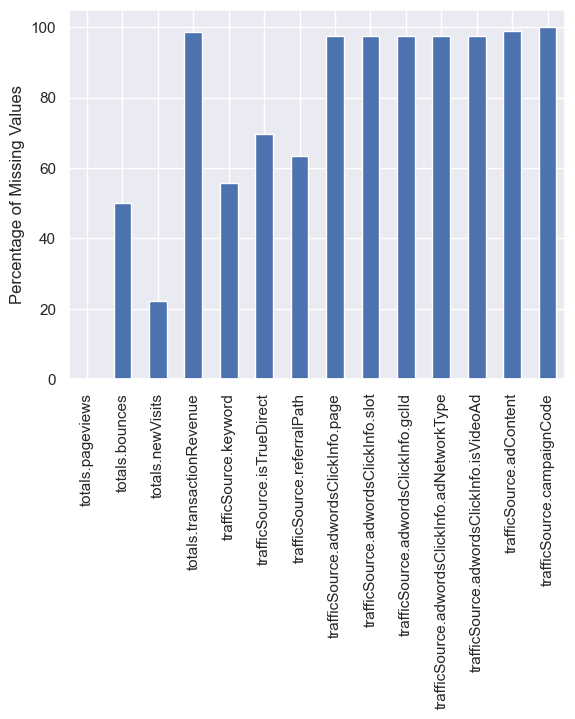

In [43]:
nan_perc = train_df.isna().mean()*100
nan_perc = nan_perc[nan_perc != 0]
sns.set_theme()
plot = nan_perc.plot(kind = 'bar')
plot.set_ylabel('Percentage of Missing Values')

#### Exploring these columns further

In [44]:
train_df['totals.transactionRevenue'].value_counts()

16990000.0     256
18990000.0     189
33590000.0     187
44790000.0     170
13590000.0     135
              ... 
491250000.0      1
89310000.0       1
103820000.0      1
88870000.0       1
69390000.0       1
Name: totals.transactionRevenue, Length: 5332, dtype: int64

#### The Nan values in this column basically indicate that no transaction has taken place. Hence, we can replace the Nan values with zeroes.

In [45]:
# Replaceing Nan values with Zeroes
train_df['totals.transactionRevenue'] = train_df['totals.transactionRevenue'].fillna(0)
train_df['totals.transactionRevenue']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
903648    0.0
903649    0.0
903650    0.0
903651    0.0
903652    0.0
Name: totals.transactionRevenue, Length: 903653, dtype: float64

#### Exploring the trafficSource.adwordsClickInfo.page column

In [46]:
train_df['trafficSource.adwordsClickInfo.page'].unique()

array([nan,  1.,  5.,  3.,  2., 14.,  7.,  9.,  4.])

In [47]:
train_df[['trafficSource.medium','trafficSource.adwordsClickInfo.page']][train_df['trafficSource.adwordsClickInfo.page'].notna()]

,trafficSource.medium,trafficSource.adwordsClickInfo.page
102,cpc,1.0
271,cpc,1.0
295,cpc,1.0
305,cpc,1.0
400,cpc,1.0
...,...,...
903270,cpc,1.0
903283,cpc,1.0
903287,cpc,1.0
903295,cpc,1.0


#### We can see that adwordsClickInfo.page data exists only for paid campaigns and it shows as Nan for organic campaigns. So we can keep this column for our analysis.

#### Exploring trafficSource.adwordsClickInfo.slot column

In [48]:
train_df[['trafficSource.medium','trafficSource.adwordsClickInfo.slot']][train_df['trafficSource.adwordsClickInfo.slot'].notna()]

,trafficSource.medium,trafficSource.adwordsClickInfo.slot
102,cpc,Top
271,cpc,Top
295,cpc,Top
305,cpc,Top
400,cpc,Top
...,...,...
903270,cpc,Top
903283,cpc,Top
903287,cpc,Top
903295,cpc,Top


####  This column is also similar to adwordsClickInfo.page. Therefore we will keep this column.

In [49]:
train_df['trafficSource.adwordsClickInfo.gclId'].value_counts().reset_index()

,index,trafficSource.adwordsClickInfo.gclId
0,Cj0KEQjwmIrJBRCRmJ_x7KDo-9oBEiQAuUPKMufMpuG3Zd...,70
1,Cj0KEQjw1ee_BRD3hK6x993YzeoBEiQA5RH_BEA562M9tv...,41
2,CJH1vbf94M8CFUElgQodyakHgQ,29
3,Cj0KEQiAw_DEBRChnYiQ_562gsEBEiQA4LcssmB_RWgvpP...,27
4,CjwKEAiAj7TCBRCp2Z22ue-zrj4SJACG7SBEJui6ggr6oc...,24
...,...,...
17769,CI-C8uGf384CFYpbhgodxCIDqg,1
17770,Cj0KEQjw0f-9BRCF9-D60_n4rKcBEiQAnXW4-1fuNQ3PSa...,1
17771,Cj0KEQjw0f-9BRCF9-D60_n4rKcBEiQAnXW4-yZ0QKHMEn...,1
17772,Cj0KEQjw0f-9BRCF9-D60_n4rKcBEiQAnXW4-7TKeFVJdA...,1


#### This is another parameter that exists only for paid campaigns.

#### Similarly trafficSource.adwordsClickInfo.adNetworkType is also a parameter used for paid ads, hence we will keep this column.

In [50]:
train_df['trafficSource.adwordsClickInfo.adNetworkType'].value_counts().reset_index()

,index,trafficSource.adwordsClickInfo.adNetworkType
0,Google Search,21453
1,Search partners,7


#### Exploring trafficSource.adwordsClickInfo.isVideoAd column

In [51]:
train_df['trafficSource.adwordsClickInfo.isVideoAd'].value_counts().reset_index()

,index,trafficSource.adwordsClickInfo.isVideoAd
0,False,21460


#### This column indicates if the traffic has come through a video ad. As we can see all the values are 'False', therefore indicating that there are no traffic coming through video ads. We can remove this column, since it does not convey any useful information.

In [52]:
# Dropping the trafficSource.adwordsClickInfo.isVideoAd column
train_df = train_df.drop('trafficSource.adwordsClickInfo.isVideoAd',axis = 1)


#### Exploring the trafficSource.adContent column

In [53]:
train_df['trafficSource.adContent'].value_counts().reset_index()

,index,trafficSource.adContent
0,Google Merchandise Collection,5122
1,Google Online Store,1245
2,Display Ad created 3/11/14,967
3,Full auto ad IMAGE ONLY,822
4,Ad from 12/13/16,610
5,Ad from 11/3/16,489
6,Display Ad created 3/11/15,392
7,{KeyWord:Google Brand Items},251
8,{KeyWord:Google Merchandise},155
9,Ad from 11/7/16,123


#### This column contains information about the different ads that were used in the paid campaigns. As this might be useful information, we will keep it.

#### There are only Nan values in the trafficSource.campaignCode column, therefore we can safely remove this column.

In [54]:
train_df = train_df.drop('trafficSource.campaignCode', axis = 1)


#### Now let us look if there are constant value columns

In [55]:
nunique = train_df.apply(pd.Series.nunique)
const_columns = nunique[nunique==1].index.to_list()
const_columns

['socialEngagementType',
 'device.browserVersion',
 'device.browserSize',
 'device.operatingSystemVersion',
 'device.mobileDeviceBranding',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.flashVersion',
 'device.language',
 'device.screenColors',
 'device.screenResolution',
 'geoNetwork.cityId',
 'geoNetwork.latitude',
 'geoNetwork.longitude',
 'geoNetwork.networkLocation',
 'totals.visits',
 'totals.bounces',
 'totals.newVisits',
 'trafficSource.adwordsClickInfo.criteriaParameters',
 'trafficSource.isTrueDirect']

#### We can remove these columns as they will not have any effect on our analysis or prediction.

In [56]:
train_df = train_df.drop(columns = const_columns)
train_df


,Unnamed: 0,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device.browser,device.operatingSystem,...,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.referralPath,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adContent
0,0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,1472830385,1,1472830385,Chrome,Windows,...,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,NaN,NaN
1,1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,1472880147,1,1472880147,Firefox,Macintosh,...,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,NaN,NaN
2,2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,1472865386,1,1472865386,Chrome,Windows,...,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,NaN,NaN
3,3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,1472881213,1,1472881213,UC Browser,Linux,...,(not set),google,organic,google + online,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,1472822600,2,1472822600,Chrome,Android,...,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903648,903648,Social,20170104,5123779100307500332,5123779100307500332_1483554750,1483554750,1,1483554750,Chrome,Windows,...,(not set),youtube.com,referral,NaN,/yt/about/,NaN,NaN,NaN,NaN,NaN
903649,903649,Social,20170104,7231728964973959842,7231728964973959842_1483543798,1483543798,1,1483543798,Chrome,Android,...,(not set),youtube.com,referral,NaN,/yt/about/,NaN,NaN,NaN,NaN,NaN
903650,903650,Social,20170104,5744576632396406899,5744576632396406899_1483526434,1483526434,1,1483526434,Android Webview,Android,...,(not set),youtube.com,referral,NaN,/yt/about/ko/,NaN,NaN,NaN,NaN,NaN
903651,903651,Social,20170104,2709355455991750775,2709355455991750775_1483592857,1483592857,1,1483592864,Chrome,Windows,...,(not set),facebook.com,referral,NaN,/l.php,NaN,NaN,NaN,NaN,NaN


#### Let us explore the revenue column. In the dataset, the revenue column is represented as the naturag log of the transactions since the objective of the competition is to predic the natural log of the transactions. Since we are not interested in predicting the natural log, we can convert these to normal transaction values. This can be achieved by dividing the transaction by 100,000

In [57]:
train_df['totals.transactionRevenue'] = train_df['totals.transactionRevenue']/100000
train_df['totals.transactionRevenue'][train_df['totals.transactionRevenue']!=0]

752        378.6
753       3066.7
799        680.3
802        262.5
859       5741.5
           ...  
903302    3352.6
903305    5999.5
903314     307.5
903315     693.9
903317     749.9
Name: totals.transactionRevenue, Length: 11515, dtype: float64

#### Now let us look at the distribution of transactions
#### We will look at only transactions that are not zero.

In [58]:
j = train_df[train_df['totals.transactionRevenue'] != 0 ]
j['totals.transactionRevenue'].describe()

count     11515.000000
mean       1337.447885
std        4482.852273
min           0.100000
25%         249.300000
50%         494.500000
75%        1076.550000
max      231295.000000
Name: totals.transactionRevenue, dtype: float64

#### We can see that although the maximum revenue value is 231295, most of the transactions are of much lower values. Infact 75% of the transactions are below 1076 dollars.  So in order to see the distribution better, we will look at trnsactions below 8000 dollars.

Text(0, 0.5, 'Count')

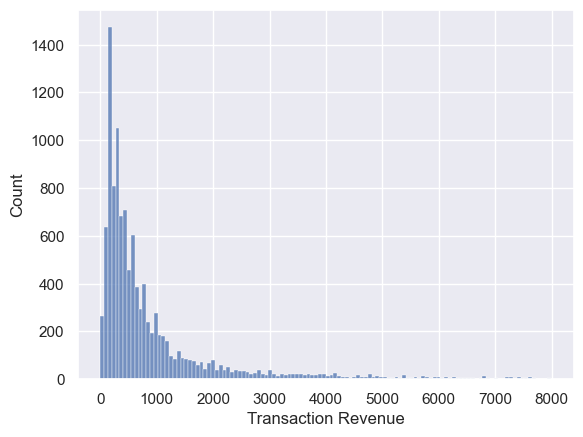

In [60]:
plot = sns.histplot(data=j[j['totals.transactionRevenue']<8000], x='totals.transactionRevenue')
plot.set_xlabel('Transaction Revenue')
plot.set_ylabel('Count')

####  Let's look at distribution of revenue, transaction and traffic through time

In [61]:
# Converting date column to datetime format
train_df['date'] = pd.to_datetime(train_df['date'], format = '%Y%m%d')


# dataframe to count daily visits
y = train_df.set_index('date')
visit_counts = y.resample('D').count().reset_index()

#dataframe to count transactions
transaction_df = train_df[train_df['totals.transactionRevenue'] != 0]
transaction_count = transaction_df.set_index('date')
transaction_count = transaction_count.resample('D').count().reset_index()

In [62]:
train_df['totals.transactionRevenue']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
903648    0.0
903649    0.0
903650    0.0
903651    0.0
903652    0.0
Name: totals.transactionRevenue, Length: 903653, dtype: float64

Text(0, 0.5, 'Dollars')

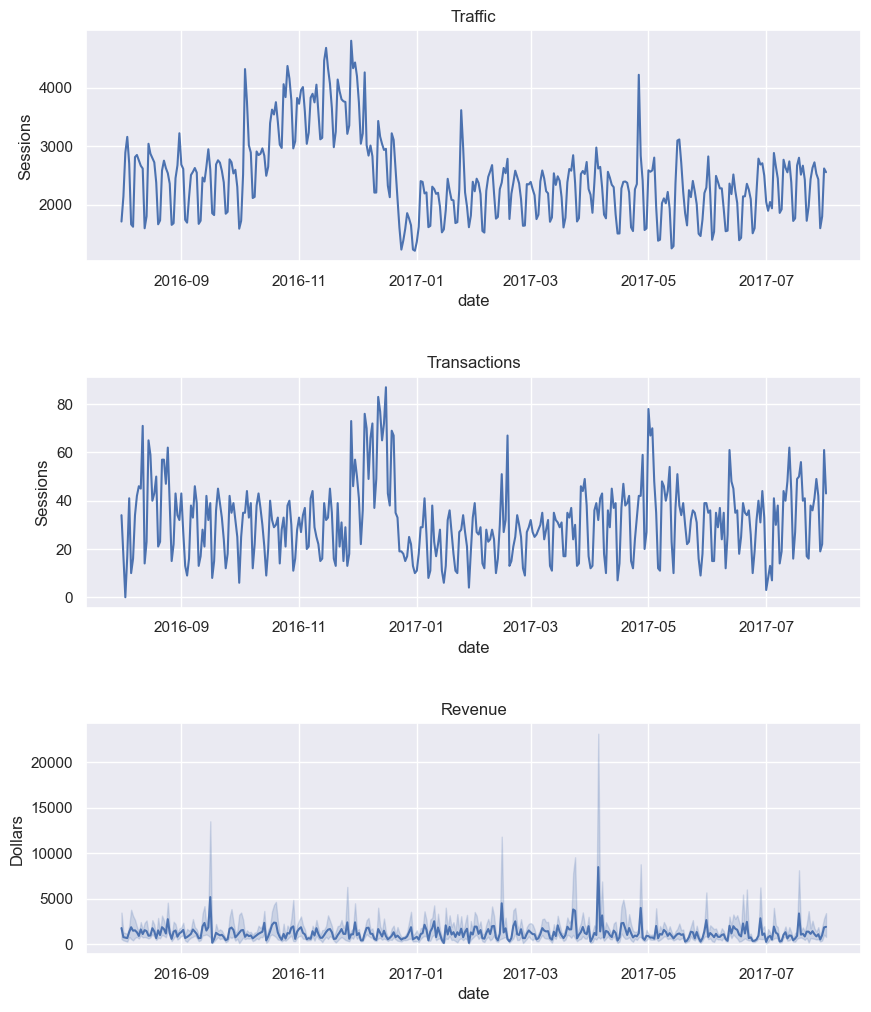

In [66]:
#plotting the graphs

figure, axes = plt.subplots(3,1, figsize = (10, 12))
figure.subplots_adjust(hspace=0.5)

#plotting traffic through time
sns.lineplot(data = visit_counts, x= 'date', y='sessionId', ax= axes[0], errorbar=None, estimator="mean")
axes[0].set_title('Traffic')
axes[0].set_ylabel('Sessions')

# plotting number of transactions through time
sns.lineplot(data = transaction_count, x = 'date', y='sessionId', ax = axes[1])
axes[1].set_title('Transactions')
axes[1].set_ylabel('Sessions')

# plotting revenue through time
sns.lineplot(data = transaction_df, x= 'date', y='totals.transactionRevenue', ax = axes[2])
axes[2].set_title('Revenue')
axes[2].set_ylabel('Dollars')

In [68]:
#function to calculate conversion rate
def conv_calculator(df_v, df_t, col_name):
    df_visit_count = df_v.groupby(col_name).count().reset_index().set_index(col_name)
    df_transaction_count = df_t.groupby(col_name).count().reset_index().set_index(col_name)
    conv_rate = (df_transaction_count['sessionId'] / df_visit_count['sessionId']) * 100
    df_conv = pd.DataFrame({col_name: df_visit_count.index, 'conv_rate': conv_rate})
    return df_conv

#### Lets explore the distribution across browsers

In [71]:
# Calculating conversion rates for each browser
df_conv_browser = conv_calculator(train_df, transaction_df, 'device.browser')
df_conv_browser = df_conv_browser[df_conv_browser['conv_rate'].notna()]

Text(0, 0.5, 'Conv Rate')

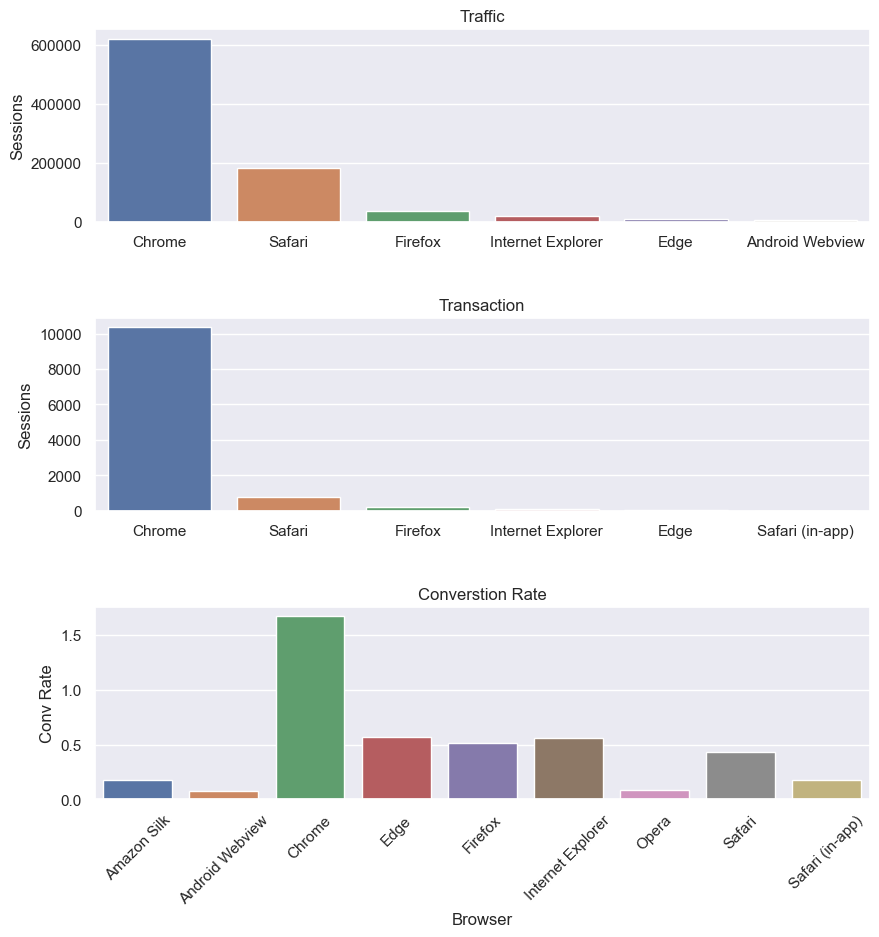

In [75]:
# plotting sessions, transactions and conversion rate plots
fig, axes = plt.subplots(3,1, figsize = (10,10))
fig.subplots_adjust(hspace = 0.5)
sns.countplot(data = train_df, x='device.browser', ax = axes[0], order = pd.value_counts(train_df['device.browser']).iloc[:6].index)
axes[0].set(xlabel= '')
axes[0].set_title('Traffic')
axes[0].set_ylabel('Sessions')
sns.countplot(data = transaction_df, x='device.browser', ax = axes[1], order = pd.value_counts(transaction_df['device.browser']).iloc[:6].index)
axes[1].set(xlabel= '')
axes[1].set_title('Transaction')
axes[1].set_ylabel('Sessions')
sns.barplot(data = df_conv_browser, x = 'device.browser', y='conv_rate' )
axes[2].set(xlabel= 'Browser')
axes[2].set_title('Converstion Rate')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)
axes[2].set_ylabel('Conv Rate')

#### As expected Chrome appears to have the most traffic, transaction and highest converstion rate.

#### Lets understand the disrtibution on mobile vs desktop

In [78]:
# calculating conversion rate on the two devices
df_conv_mob = conv_calculator(train_df, transaction_df, 'device.isMobile')

Text(0.5, 0, 'Device Type')

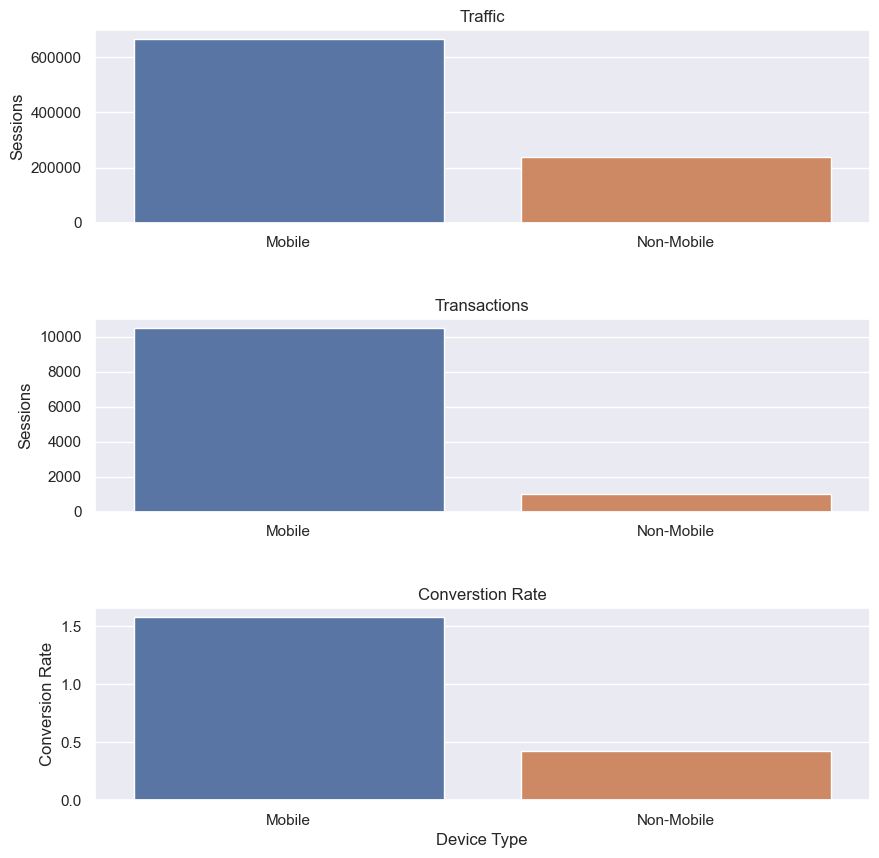

In [83]:
fig, axes = plt.subplots(3,1, figsize = (10,10))
fig.subplots_adjust(hspace=0.5)
sns.countplot(data = train_df, x= 'device.isMobile', ax = axes[0])
axes[0].set_xlabel('')
axes[0].set_ylabel('Sessions')
axes[0].set_title('Traffic')
sns.countplot(data = transaction_df, x = 'device.isMobile', ax = axes[1])
axes[1].set_xlabel('')
axes[1].set_ylabel('Sessions')
axes[1].set_title('Transactions')
sns.barplot(data = df_conv_mob, x='device.isMobile', y='conv_rate', ax = axes[2])
axes[2].set_ylabel('Conversion Rate')
axes[2].set_title('Converstion Rate')
for ax in axes:
    ax.set_xticklabels(['Mobile','Non-Mobile'])
axes[2].set_xlabel('Device Type')

#### Distribution across countries

In [84]:
# creating dataframe with top 25 countries with most visits
counts = pd.value_counts(train_df['geoNetwork.country']).reset_index()
counts.columns = ['country', 'count']
treemap_df = counts[:25]
other_sum = counts[25:]['count'].sum()
other = ['Other', other_sum]
treemap_df.loc[len(treemap_df)] = other
treemap_df

/var/folders/pf/h7r0xfy90zj7hymt1khj60600000gn/T/ipykernel_89672/3735053491.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treemap_df.loc[len(treemap_df)] = other


,country,count
0,United States,364744
1,India,51140
2,United Kingdom,37393
3,Canada,25869
4,Vietnam,24598
5,Turkey,20522
6,Thailand,20123
7,Germany,19980
8,Brazil,19783
9,Japan,19731


In [85]:
#creating dataframe with top 25 countries with most transactions
transaction_counts = pd.value_counts(transaction_df['geoNetwork.country']).reset_index()
transaction_counts.columns = ['country', 'count']
transaction_treemap_df = transaction_counts[:7]
transaction_other_sum = transaction_counts[7:]['count'].sum()
transaction_other = ['Other', transaction_other_sum]
transaction_treemap_df.loc[len(treemap_df)] = transaction_other
transaction_treemap_df

/var/folders/pf/h7r0xfy90zj7hymt1khj60600000gn/T/ipykernel_89672/3276813591.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_treemap_df.loc[len(treemap_df)] = transaction_other


,country,count
0,United States,10953
1,Canada,190
2,Venezuela,63
3,Mexico,20
4,Taiwan,19
5,Japan,17
6,United Kingdom,16
26,Other,237


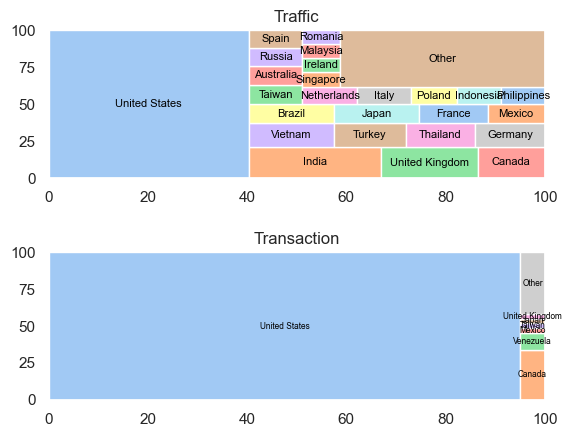

In [88]:
# plotting treemaps
import matplotlib.cm as cm
fig, axes = plt.subplots(2,1)
fig.subplots_adjust(hspace = 0.5)
squarify.plot(data = treemap_df['count'], sizes = treemap_df['count'], label = treemap_df['country'], color = sns.color_palette("pastel", len(treemap_df)),  text_kwargs={'fontsize':8, 'color': 'black'}, ax = axes[0] )
axes[0].set_title('Traffic')
squarify.plot(data = transaction_treemap_df['count'], sizes = transaction_treemap_df['count'], label = transaction_treemap_df['country'], color = sns.color_palette("pastel", len(transaction_treemap_df)),  text_kwargs={'fontsize':6, 'color': 'black'}, ax = axes[1] )
axes[1].set_title('Transaction')
plt.show()

#### As we can see, United States has the highest proportion of Traffic and Transactions.

#### Now let's look at conversion rates across different couintries


In [105]:
# creating dataframe with conversion rates for countries
df_conv_country = conv_calculator(train_df, transaction_df, 'geoNetwork.country')
df_conv_country.sort_values('conv_rate')

,geoNetwork.country,conv_rate
geoNetwork.country,,
Turkey,Turkey,0.009746
Romania,Romania,0.015557
Spain,Spain,0.017156
Italy,Italy,0.017649
India,India,0.019554
...,...,...
Vietnam,Vietnam,NaN
Yemen,Yemen,NaN
Zambia,Zambia,NaN


In [106]:
#creating country code 
import country_converter as coco
cc = coco.CountryConverter()
df_conv_country['CODE'] = df_conv_country['geoNetwork.country'].apply(lambda x: cc.convert(names=x, to='ISO3', not_found=None))
df_conv_country

(not set) not found in regex


,geoNetwork.country,conv_rate,CODE
geoNetwork.country,,,
(not set),(not set),0.408719,(not set)
Afghanistan,Afghanistan,NaN,AFG
Albania,Albania,NaN,ALB
Algeria,Algeria,NaN,DZA
American Samoa,American Samoa,NaN,ASM
...,...,...,...
Vietnam,Vietnam,NaN,VNM
Yemen,Yemen,NaN,YEM
Zambia,Zambia,NaN,ZMB


In [107]:
#Getting geometry
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns = {'iso_a3':'CODE'})
world


,pop_est,continent,name,CODE,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [108]:
pd.set_option('display.max_rows', 10)
#Merging geometry with CODE
df_conv_country = pd.merge(world, df_conv_country,'outer' ,on = 'CODE')
df_conv_country.sort_values('conv_rate', ascending = False)


,pop_est,continent,name,CODE,gdp_md_est,geometry,geoNetwork.country,conv_rate
180,NaN,NaN,NaN,AIA,NaN,None,Anguilla,100.000000
225,NaN,NaN,NaN,LCA,NaN,None,St. Lucia,8.333333
199,NaN,NaN,NaN,GLP,NaN,None,Guadeloupe,3.448276
192,NaN,NaN,NaN,CUW,NaN,None,Curaçao,3.333333
4,328239523.0,North America,United States of America,USA,21433226.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,3.002928
...,...,...,...,...,...,...,...,...
228,NaN,NaN,NaN,VCT,NaN,None,St. Vincent & Grenadines,NaN
229,NaN,NaN,NaN,STP,NaN,None,São Tomé & Príncipe,NaN
230,NaN,NaN,NaN,TCA,NaN,None,Turks & Caicos Islands,NaN
231,NaN,NaN,NaN,VIR,NaN,None,U.S. Virgin Islands,NaN


In [109]:
#Removing Anguilla from dataset as it has a conversion rate of 100% which skews the map plot
b = df_conv_country[(df_conv_country['geoNetwork.country'] != 'Anguilla')& (df_conv_country['geoNetwork.country'] != 'St. Lucia') ]


,pop_est,continent,name,CODE,gdp_md_est,geometry,geoNetwork.country,conv_rate
0,889953.0,Oceania,Fiji,FJI,5496.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,NaN
1,58005463.0,Africa,Tanzania,TZA,63177.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,NaN
2,603253.0,Africa,W. Sahara,ESH,907.0,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,0.734470
4,328239523.0,North America,United States of America,USA,21433226.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,3.002928
...,...,...,...,...,...,...,...,...
228,NaN,NaN,NaN,VCT,NaN,None,St. Vincent & Grenadines,NaN
229,NaN,NaN,NaN,STP,NaN,None,São Tomé & Príncipe,NaN
230,NaN,NaN,NaN,TCA,NaN,None,Turks & Caicos Islands,NaN
231,NaN,NaN,NaN,VIR,NaN,None,U.S. Virgin Islands,NaN


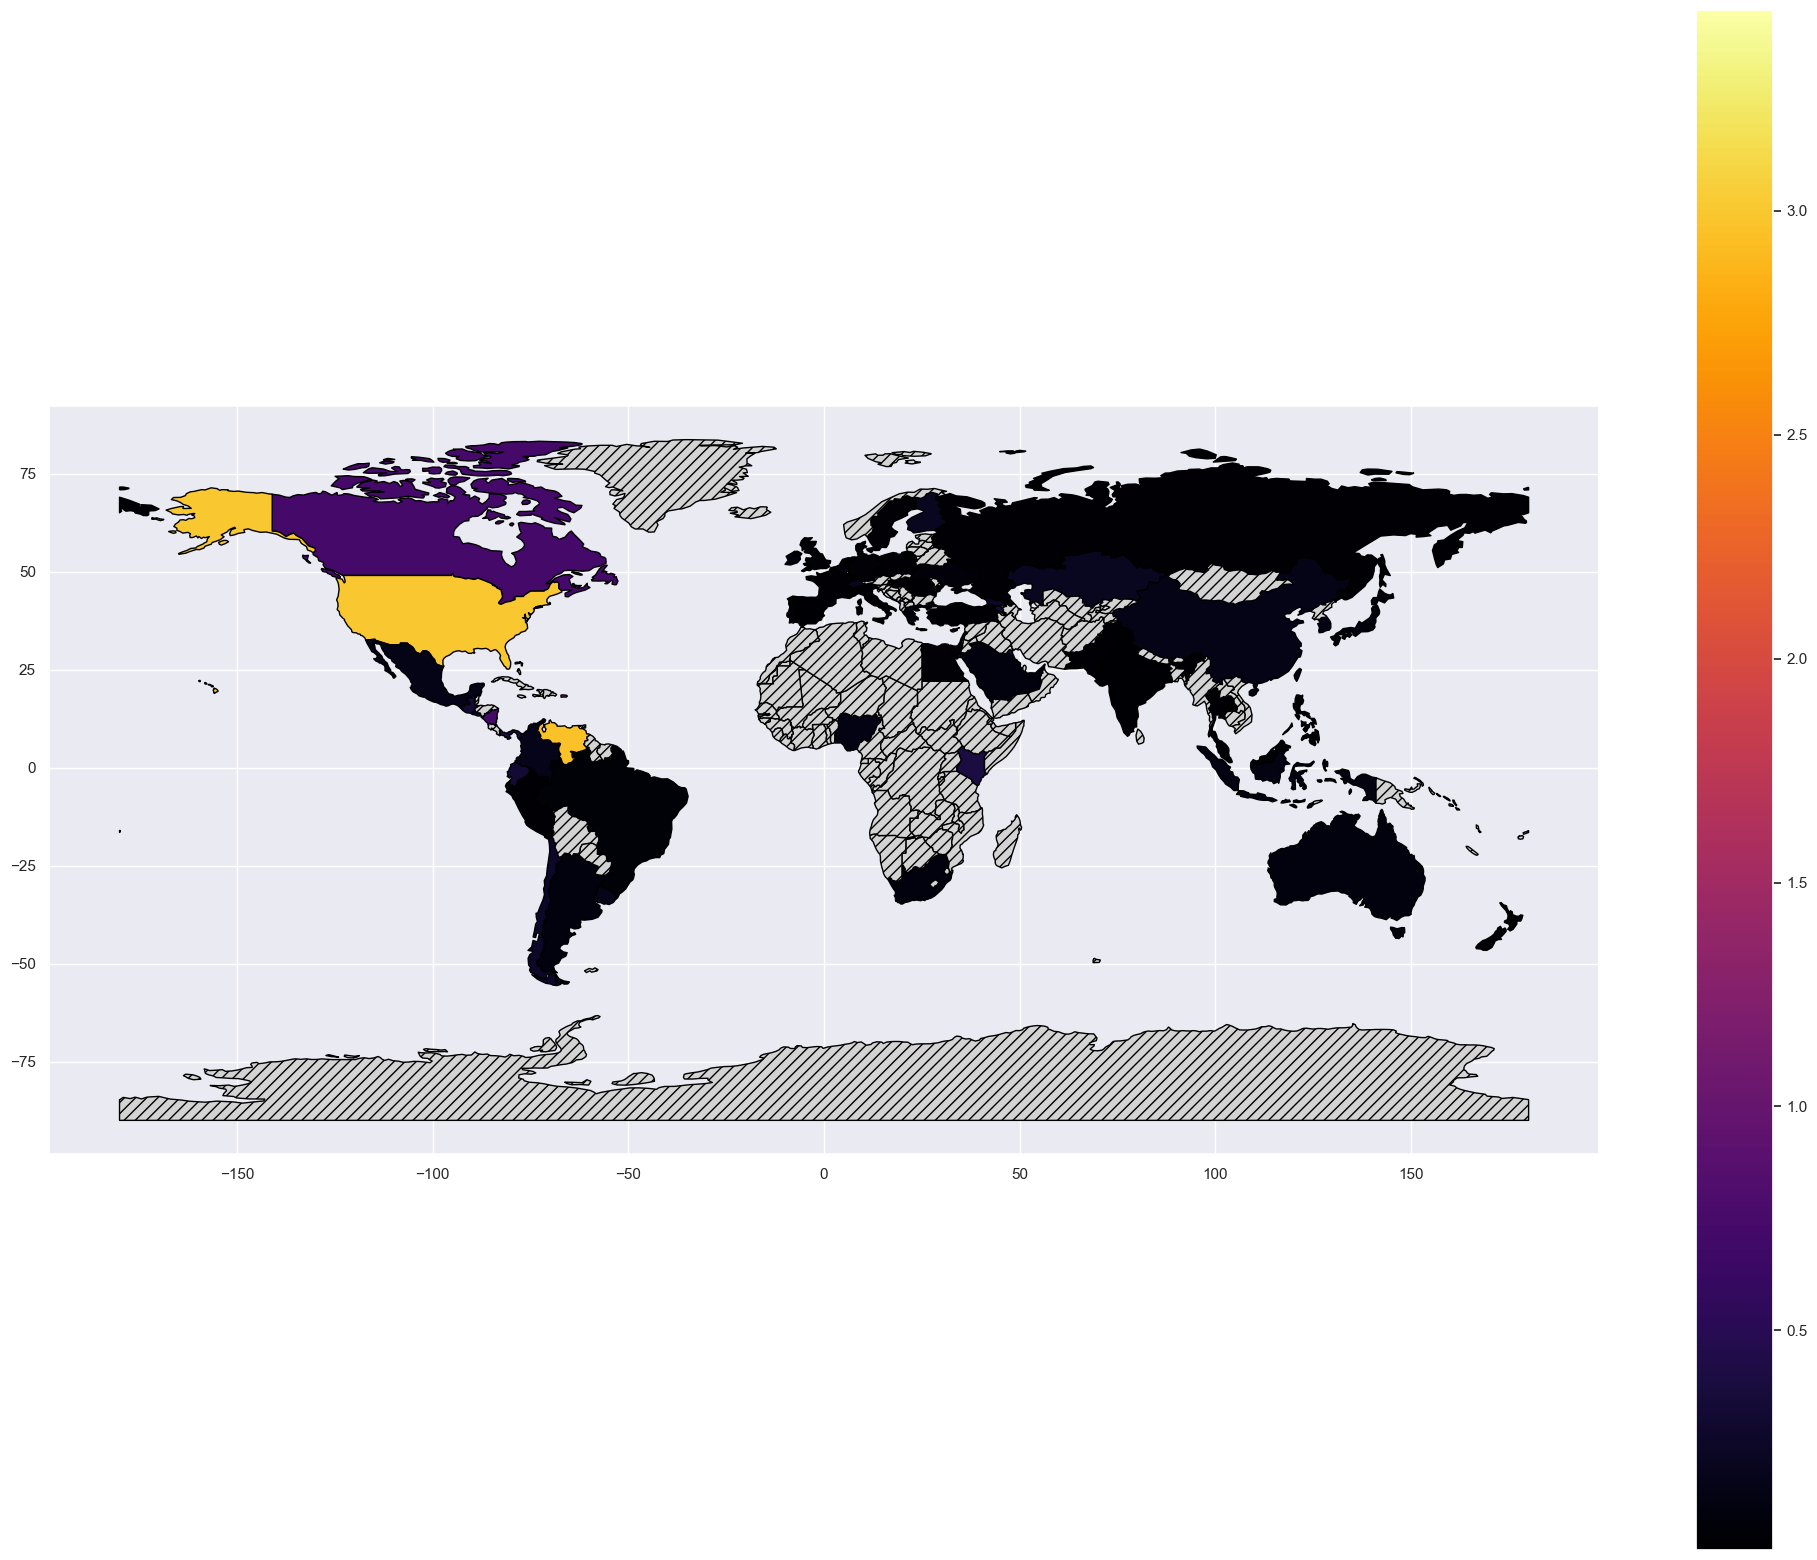

In [110]:
#plotting map
missing_style = {'color': 'lightgray', 'hatch': '///'}
b.plot(column='conv_rate',
           figsize=(25, 20),
           legend=True,cmap='inferno',
           edgecolor = 'black',
      missing_kwds=missing_style)
plt.show()

#### Now let's look at distribution through day of week and hour

#### Creating dataframes with records on each day and each hour of the day which will be used to plot the heatmaps

In [111]:
# creating total visits datframe
x =train_df.groupby(['day', 'hour']).count().reset_index()
x = x[['day', 'hour','channelGrouping']]
x = x.pivot(index = 'day', columns = 'hour', values = 'channelGrouping')
reorder = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
x = x.reindex(reorder)

# creating total transaction datframe
x_transaction =transaction_df.groupby(['day', 'hour']).count().reset_index()
x_transaction = x_transaction[['day', 'hour','channelGrouping']]
x_transaction = x_transaction.pivot(index = 'day', columns = 'hour', values = 'channelGrouping')
reorder = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
x_transaction = x_transaction.reindex(reorder)


# creating conversion rate dataframe
x_conv = (x_transaction/x)*100


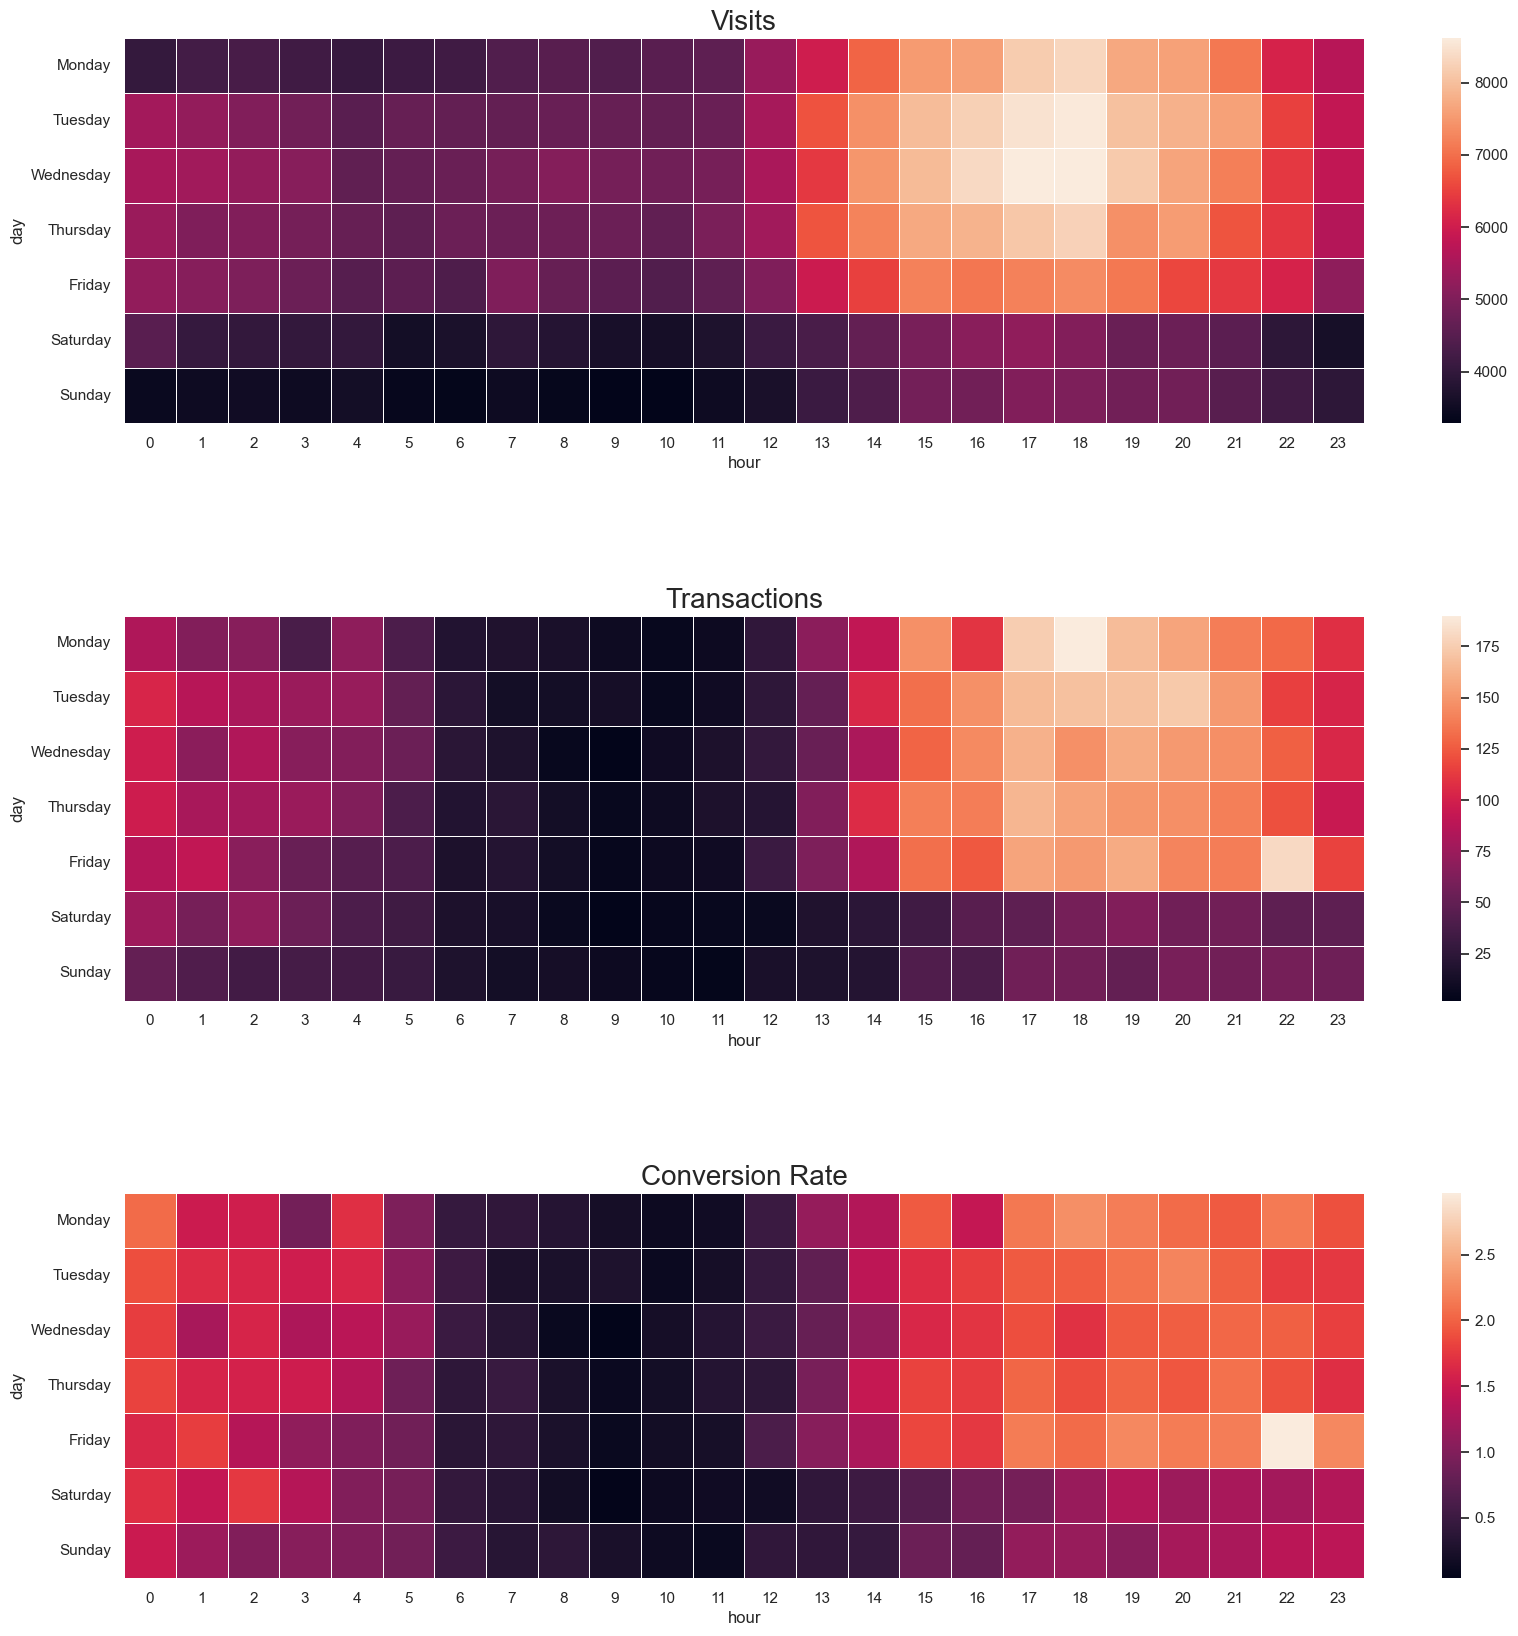

In [112]:
# plotting heatmaps
figure, axes = plt.subplots(3,1, figsize = (20,20))
figure.subplots_adjust(hspace=0.5)
sns.heatmap(x, linewidth = 0.5, ax = axes[0])
axes[0].set_title('Visits', size = 20)
sns.heatmap(x_transaction, linewidth = 0.5, ax = axes[1])
axes[1].set_title('Transactions', size = 20)
sns.heatmap(x_conv, linewidth =0.5, ax = axes[2])
axes[2].set_title('Conversion Rate', size = 20)
plt.show()

#### From the plots, we can infer that the second half of the day on weekdays have higher values for all three metrics.

#### Lets look at different medium of traffic source

In [113]:
conv_rate_medium = conv_calculator(train_df, transaction_df, 'trafficSource.medium')
conv_rate_medium

,trafficSource.medium,conv_rate
trafficSource.medium,,
(none),(none),1.427712
(not set),(not set),0.833333
affiliate,affiliate,0.054868
cpc,cpc,1.847903
cpm,cpm,2.267646
organic,organic,0.901035
referral,referral,1.636174


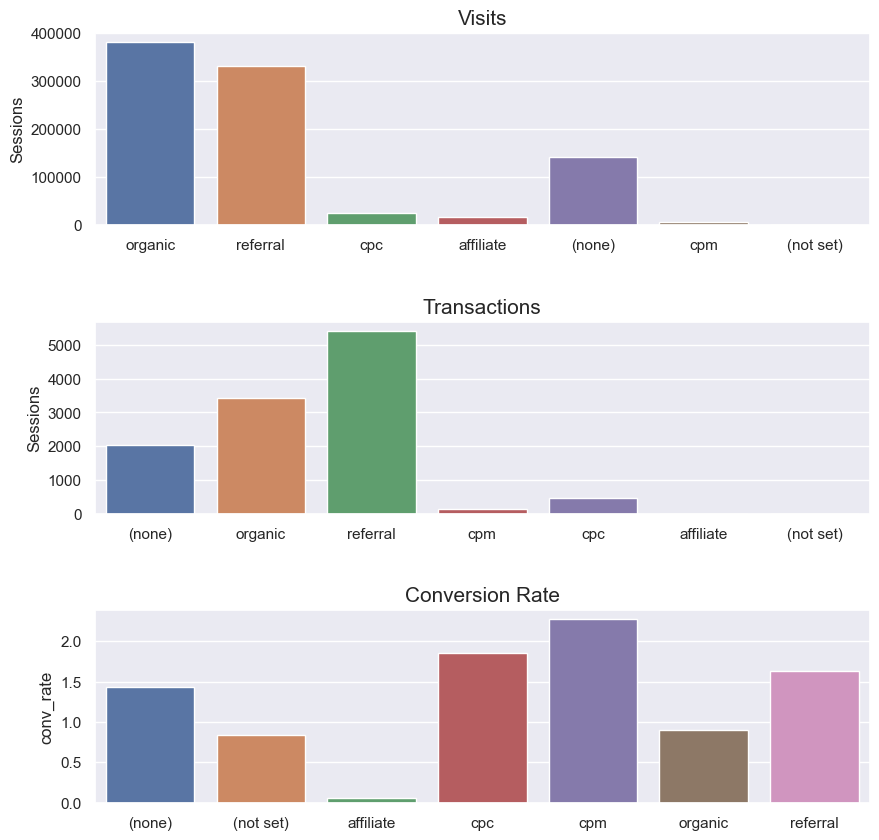

In [121]:
figure, axes = plt.subplots(3,1, figsize = (10,10))
figure.subplots_adjust(hspace=0.5)
sns.countplot(data = train_df, x = 'trafficSource.medium', ax = axes[0])
axes[0].set_title('Visits', size = 15)
axes[0].set_ylabel('Sessions')
sns.countplot(data = transaction_df, x = 'trafficSource.medium', ax = axes[1] )
axes[1].set_title('Transactions', size = 15)
axes[1].set_ylabel('Sessions')
sns.barplot(data = conv_rate_medium,  x = 'trafficSource.medium',y = 'conv_rate', ax = axes[2])
axes[2].set_title('Conversion Rate', size = 15)
for ax in axes:
    ax.set_xlabel('')

#### Although maximum traffic comes through organic sources, Transactions are highest for referral medium. We can also see that conversion rates are higher for CPC anfd CPM which are paid media sources.

#### Creating a column to record a transaction


In [123]:
train_df['transaction'] = train_df['totals.transactionRevenue'].apply(lambda x: 1 if x != 0 else 0)


#### Lets see if there is a relation between number of visits and transaction revenue

<AxesSubplot:xlabel='no_visits', ylabel='revenue'>

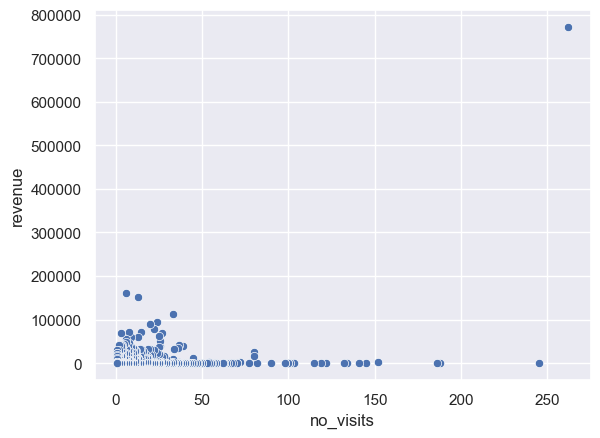

In [124]:
counts = pd.DataFrame(train_df['fullVisitorId'].value_counts())
grouped = train_df.groupby('fullVisitorId').agg({'totals.transactionRevenue':'sum'})
result_df = pd.concat([counts,grouped], axis = 1)
result_df.columns = ['no_visits', 'revenue']
sns.scatterplot(data = result_df, x = 'no_visits', y ='revenue' )                                              

#### We cannot observe any trend here

#### Exploring Pageviews

In [127]:
o = train_df[train_df['totals.pageviews'] < 20]

In [128]:
o['totals.pageviews']

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
903645     8.0
903646    12.0
903647    11.0
903648    15.0
903649    13.0
Name: totals.pageviews, Length: 876184, dtype: float64

In [129]:
pg_transactions = train_df[['totals.pageviews','transaction']].groupby('totals.pageviews').sum('transaction').reset_index()
pg_transactions = pg_transactions[pg_transactions['totals.pageviews'] < 100]
pg_transactions

,totals.pageviews,transaction
0,1.0,0
1,2.0,4
2,3.0,3
3,4.0,8
4,5.0,13
...,...,...
94,95.0,4
95,96.0,5
96,97.0,4
97,98.0,2


Text(0, 0.5, 'Transactions')

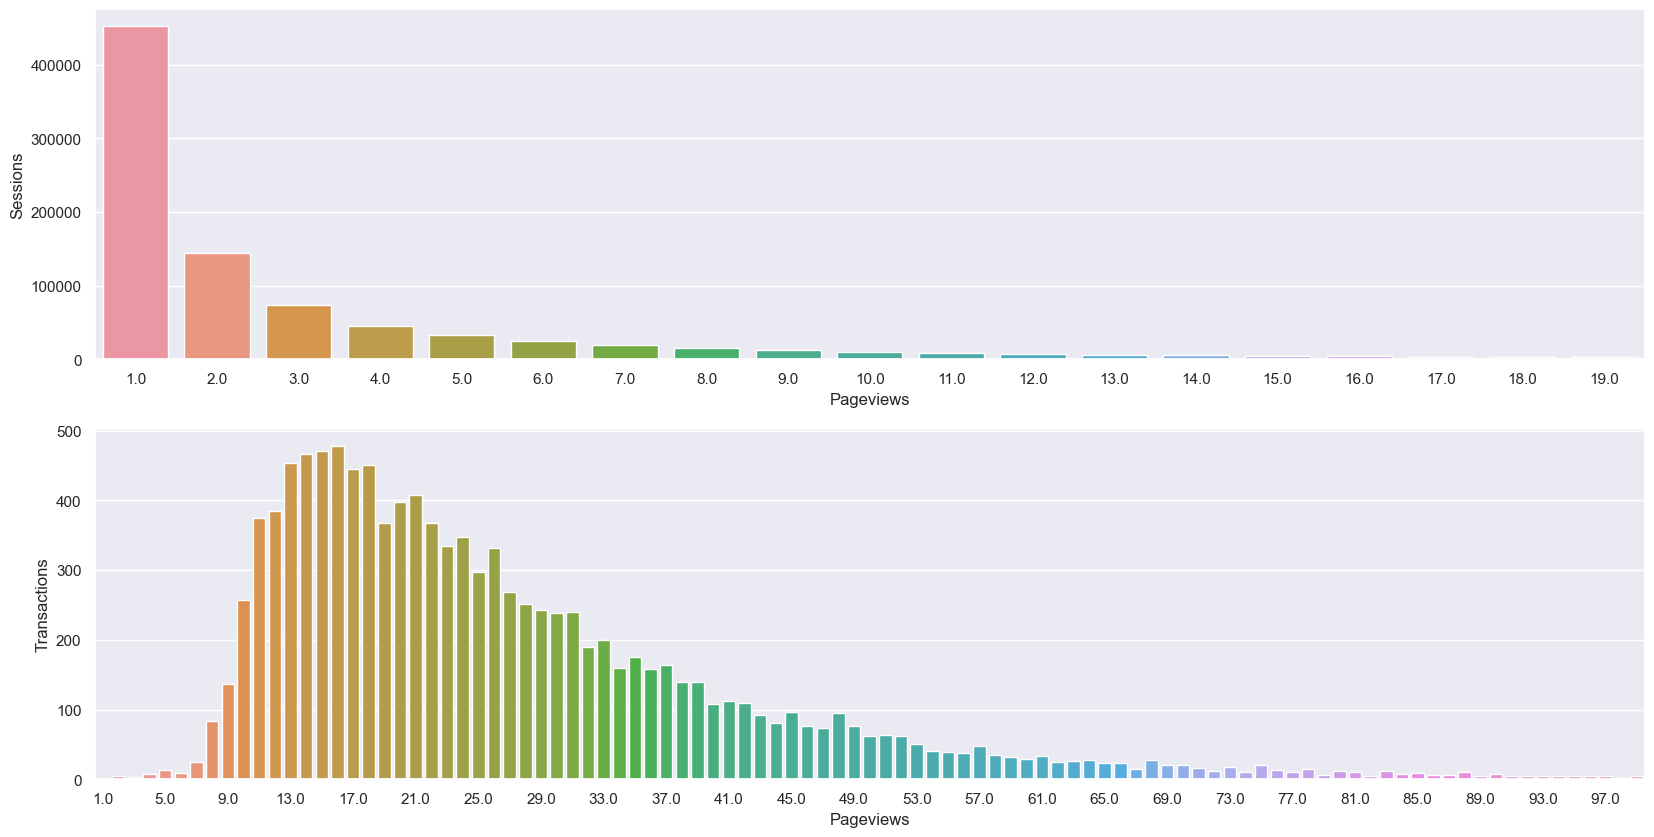

In [133]:
figure, axes = plt.subplots(2,1,figsize = (20,10))
sns.countplot(data = o, x = 'totals.pageviews', ax = axes[0])
sns.barplot(data = pg_transactions, x = 'totals.pageviews', y= 'transaction', ax= axes[1])
plt.xticks(ticks=range(0, len(pg_transactions['totals.pageviews'].unique()), 4), 
           labels=pg_transactions['totals.pageviews'].unique()[::4])
axes[0].set_xlabel('Pageviews')
axes[0].set_ylabel('Sessions')
axes[1].set_xlabel('Pageviews')
axes[1].set_ylabel('Transactions')

#### As we can see, most visitors have only a small number of pageviews. However, most transactions happen in the range between 10 and 25 pageviews. This information can be used to target users with pageviews in this range with incentives such as discounts to complete the transaction.